# Import libraries and data

For importing data, you will need the Pandas library, in particular the `read_csv` function. Data need to be uploaded to colab manually using the "Upload to session storage" button on the Files tab at the left of the workspace

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_df = pd.read_csv('D03_signal1.csv')

To extract data in a pandas dataframe to a Numpy array it is possible to use the `values` attribute of the dataframe

In [58]:
data = data_df.values
print(type(data))

<class 'numpy.ndarray'>


# Visualize the signal

When plotting data in Jupiter, it is not possible to have an interactive visualization. To zoom in on the figure, you can slice the data using the `[:]` notation and the `figsize` attribute when creating the figure

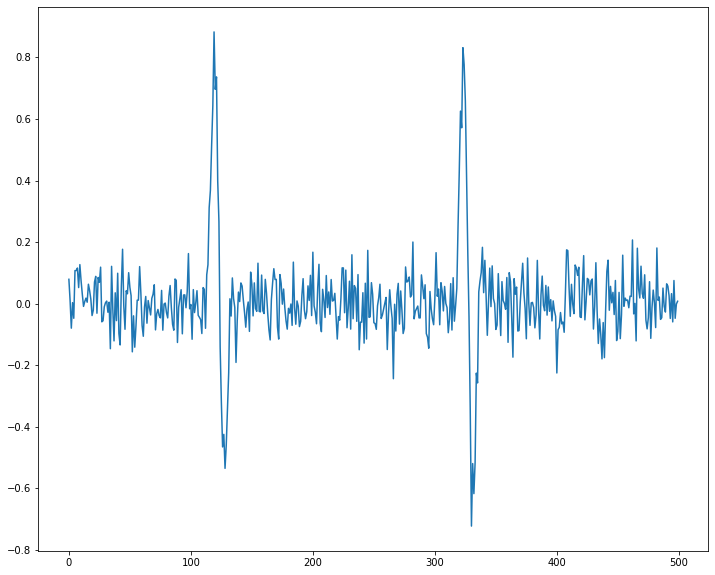

In [59]:
plt.figure(figsize=(12,10))
plt.plot(data[1100:1600])
plt.show()

# Find the peaks in the signal

In order to find the spikes, it is possible to use the `find_peaks` function in the `signal` submodule of `scipy`. This function has different inputs that can be used to select the spikes based on a threshold method and by taking into account the refractory period

In [67]:
import scipy.signal as sgn

threshold = 0.75
min_distance = 30 # 3ms at 10 kHz

pk_loc = sgn.find_peaks(data.flatten(), height=threshold, distance=min_distance)[0]

After finding the peaks, it can be useful to plot the peak samples over the original signal, to check whether all the peaks have been identified correctly

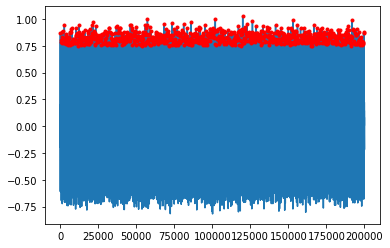

In [68]:
plt.figure()
plt.plot(data)
plt.plot(pk_loc, data[pk_loc], 'r.')
plt.show()

# Evaluate the firing rate

Once having the indexes, it is possible to calculate the inter-spike interval directly from the output of the `find_peaks` function. From the inter-spike interval, the instantaneous firing rate can also be calculated after converting the ISI to seconds

In [69]:
isi = np.diff(pk_loc) # This is in samples, needs to be converted in seconds
isi = isi/10000
instantaneous_fr = 1/isi

print(f'Mean ISI: {np.mean(isi):.4f} ms')
print(f'Std ISI: {np.std(isi):.4f} ms')
print(f'Mean firing rate: {np.mean(instantaneous_fr):.4f} Hz')
print(f'Std firing rate: {np.std(instantaneous_fr):.4f} Hz')

Mean ISI: 0.0223 ms
Std ISI: 0.0075 ms
Mean firing rate: 47.4410 Hz
Std firing rate: 8.0527 Hz


It can also be useful to check the histogram of the firing rate, to evaluate the presence of outliers and/or anomalies

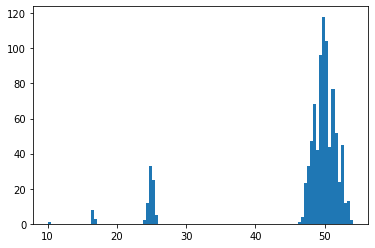

In [70]:
plt.figure()
plt.hist(instantaneous_fr, bins=100)
plt.show()

# Segmenting the spikes

An important step for the subsequent spike sorting phase is to segment the spikes. A "safe" way to do so is to segment a portion of the signal centered on each peak and wide two times the duration of the refractory period.

In [71]:
spikes = [] # Define an empty list for the spikes

for loc in pk_loc:
  spikes.append(data[loc-min_distance : loc+min_distance].flatten()) # Append each spike to the list

spikes = np.asarray(spikes) # Convert the list to a Numpy array
print(spikes.shape)

# Each spike MUST be a column of the data matrix, so in this case you need to transpose the matrix
spikes = spikes.transpose()

(895, 60)


It is useful to plot all the superimposed spikes to check the quality of the detection

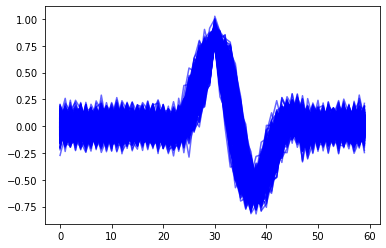

In [72]:
plt.figure()
plt.plot(spikes,'b', alpha=0.6) 
plt.show()

If the spikes are correctly identified and they are coming from a single neuron, it is possible to define its average profile

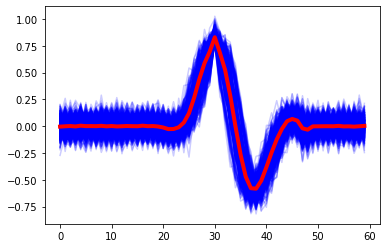

In [74]:
spike_avg = np.mean(spikes, axis=1) # axis=1 means averaging all the columns (i.e. all the spikes)

plt.figure()
plt.plot(spikes, 'b', alpha=0.2)
plt.plot(spike_avg, 'r', lw=4)
plt.show()